### Common Imports of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

### Load the dataframe to the memory

In [2]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

model_df = model_df.head(5)

### Common functions

In [3]:
# make a group with serial no of drive and return the last count no of days

def group_by_serial_number(df, count):

    # Group the instances dataframe by serial number
    grouped_instances = df.groupby('serial_number')

    # Create an empty list to store the last 150 samples for each serial number
    last_n = []

    # Iterate over each group
    for name, group in grouped_instances:
        # Get the last n (count) samples for the current serial number
        last_n_group = group.tail(count)
        # Append the last n samples to the list
        last_n.append(last_n_group)

    # Concatenate the list of dataframes into a single dataframe
    instance_last_n = pd.concat(last_n)

    # Reset the index of the dataframe
    instance_last_n.reset_index(drop=True, inplace=True)

    # Drop the date column from the dataframe
    # instance_last_n.drop(columns=['date'], inplace=True)

    # reset index
    instance_last_n.reset_index(drop=True, inplace=True)

    # Print the updated dataframe
    # instance_last_n.head()

    return instance_last_n

In [4]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    if 'model' in model_df.columns:
        model_df.drop(columns=['model'], inplace=True)
    if 'serial_number' in model_df.columns:
        model_df.drop(columns=['serial_number'], inplace=True)
    return model_df

In [5]:
def get_clean_model_data(df):
    test = df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == df.shape[0]:
            d_col.append(k)
    df.drop(columns=d_col, inplace=True)
    return df

In [6]:
def get_clear_data(df):
    # Drop the date column from the dataframe
    if 'data' in df.columns:
        df.drop(columns=['date'], inplace=True)
    if 'model' in df.columns:
        df.drop(columns=['model'], inplace=True)
    if 'serial_number' in df.columns:
        df.drop(columns=['serial_number'], inplace=True)
    df_filled = df.fillna(df.mean())
    return df_filled

In [7]:
model_data = group_by_serial_number(df, 15)
model_data = get_clear_data(model_data)
model_data.shape
model_data = model_data.copy()

In [8]:
model_data.head()

,Reallocated_Sectors_Count,Power-On_Hours,I/O_Error_Detection_and_Correction,Reported_Uncorrectable_Errors,Load_Unload_Cycle,Current_Pending_Sector_Count,Offline_Uncorrectable,Head_Flying_Hours,Total_LBAs_Written,Total_LBAs_Read,failure
0,0.011720,0.310616,0.00119,0.002511,0.00129,0.000849,0.000723,0.42734,0.382399,0.043192,0
1,0.011964,0.310962,0.00119,0.002511,0.00129,0.000849,0.000723,0.42734,0.382480,0.043219,0
2,0.011964,0.311210,0.00119,0.002511,0.00129,0.000849,0.000723,0.42734,0.382577,0.043239,0
3,0.012086,0.311557,0.00119,0.002511,0.00129,0.000849,0.000723,0.42734,0.382661,0.043262,0
4,0.012086,0.311817,0.00119,0.002511,0.00129,0.000849,0.000723,0.42734,0.382774,0.043284,0


In [9]:
# Split the dataframe into features (X) and target (y)
X = model_data.drop(columns=['failure'])
y = model_data['failure']

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [12]:
# Evaluate Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Precision: {precision_score(y_test, rf_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, rf_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, rf_predictions, average='weighted')}")
print(classification_report(y_test, rf_predictions))

# Evaluate Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions)}")
print(f"Precision: {precision_score(y_test, gb_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, gb_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, gb_predictions, average='weighted')}")
print(classification_report(y_test, gb_predictions))

Random Forest Metrics:
Accuracy: 0.9143321792047004
Precision: 0.8698378057451831
Recall: 0.9143321792047004
F1-Score: 0.8911925174103219
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     17771
           1       0.02      0.01      0.01      1291

    accuracy                           0.91     19062
   macro avg       0.48      0.49      0.48     19062
weighted avg       0.87      0.91      0.89     19062


Gradient Boosting Metrics:
Accuracy: 0.9320637918371629
Precision: 0.8935204259402378
Recall: 0.9320637918371629
F1-Score: 0.9000026271786162
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17771
           1       0.36      0.00      0.01      1291

    accuracy                           0.93     19062
   macro avg       0.64      0.50      0.49     19062
weighted avg       0.89      0.93      0.90     19062



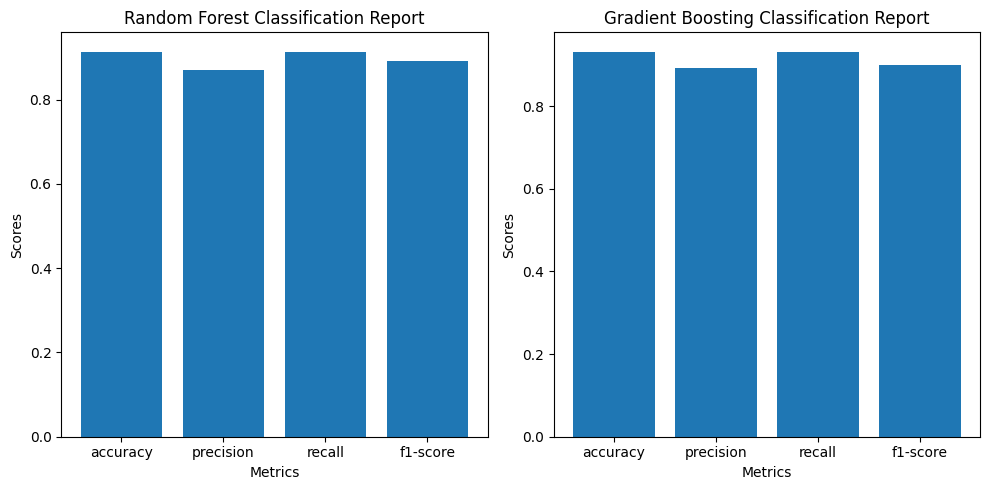

In [21]:
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Calculate the classification report for Random Forest
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
rf_scores = [rf_report['accuracy'], rf_report['weighted avg']['precision'], rf_report['weighted avg']['recall'], rf_report['weighted avg']['f1-score']]

# Calculate the classification report for Gradient Boosting
gb_report = classification_report(y_test, gb_predictions, output_dict=True)
gb_metrics = ['accuracy', 'precision', 'recall', 'f1-score']
gb_scores = [gb_report['accuracy'], gb_report['weighted avg']['precision'], gb_report['weighted avg']['recall'], gb_report['weighted avg']['f1-score']]

# Plot the graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(rf_metrics, rf_scores, label='Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Random Forest Classification Report')
plt.subplot(1, 2, 2)
plt.bar(gb_metrics, gb_scores, label='Gradient Boosting')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Gradient Boosting Classification Report')

plt.tight_layout()
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Split the dataframe into features (X) and target (y)
X = model_data.drop(columns=['failure'])
y = model_data['failure']

# Random oversampling
ros = RandomOverSampler(random_state=42)
X_random_resampled, y_random_resampled = ros.fit_resample(X, y)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_random_resampled, y_random_resampled, test_size=0.3, random_state=42)

In [23]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [24]:
# Evaluate Random Forest
print("Random Forest Metrics: Ramdom oversalping")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Precision: {precision_score(y_test, rf_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, rf_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, rf_predictions, average='weighted')}")
print(classification_report(y_test, rf_predictions))

# Evaluate Gradient Boosting
print("\nGradient Boosting Metrics: Ramdom oversalping")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions)}")
print(f"Precision: {precision_score(y_test, gb_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, gb_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, gb_predictions, average='weighted')}")
print(classification_report(y_test, gb_predictions))

Random Forest Metrics: Ramdom oversalping
Accuracy: 0.9683483652762119
Precision: 0.9701222012215585
Recall: 0.9683483652762119
F1-Score: 0.9683272671274409
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     17896
           1       0.94      1.00      0.97     17584

    accuracy                           0.97     35480
   macro avg       0.97      0.97      0.97     35480
weighted avg       0.97      0.97      0.97     35480


Gradient Boosting Metrics: Ramdom oversalping
Accuracy: 0.594250281848929
Precision: 0.5942239603728601
Recall: 0.594250281848929
F1-Score: 0.5942221634926876
              precision    recall  f1-score   support

           0       0.60      0.60      0.60     17896
           1       0.59      0.59      0.59     17584

    accuracy                           0.59     35480
   macro avg       0.59      0.59      0.59     35480
weighted avg       0.59      0.59      0.59     35480



In [26]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Split the dataframe into features (X) and target (y)
X = model_data.drop(columns=['failure'])
y = model_data['failure']

# Tomek Links
tl = TomekLinks(sampling_strategy='majority')
X_tomek_resampled, y_tomek_resampled = tl.fit_resample(X, y)

# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_tomek_resampled, y_tomek_resampled, test_size=0.3, random_state=42)

In [27]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

In [29]:
# Evaluate Random Forest
print("Random Forest Metrics: Tokem undersamlping")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Precision: {precision_score(y_test, rf_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, rf_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, rf_predictions, average='weighted')}")
print(classification_report(y_test, rf_predictions))

# Evaluate Gradient Boosting
print("\nGradient Boosting Metrics: Tokem undersamlping")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions)}")
print(f"Precision: {precision_score(y_test, gb_predictions, average='weighted')}")
print(f"Recall: {recall_score(y_test, gb_predictions, average='weighted')}")
print(f"F1-Score: {f1_score(y_test, gb_predictions, average='weighted')}")
print(classification_report(y_test, gb_predictions))

Random Forest Metrics: Tokem undersamlping
Accuracy: 0.917850558507754
Precision: 0.8643665570927896
Recall: 0.917850558507754
F1-Score: 0.8886617441676746
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     17099
           1       0.07      0.01      0.02      1343

    accuracy                           0.92     18442
   macro avg       0.50      0.50      0.49     18442
weighted avg       0.86      0.92      0.89     18442


Gradient Boosting Metrics: Tokem undersamlping
Accuracy: 0.927177095759679
Precision: 0.8963697178421289
Recall: 0.927177095759679
F1-Score: 0.8928790342071272
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     17099
           1       0.50      0.01      0.01      1343

    accuracy                           0.93     18442
   macro avg       0.71      0.50      0.49     18442
weighted avg       0.90      0.93      0.89     18442

